In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2. Məlumatı yükləmək
file_path = "data_preparation/crop_yield_prediction.csv"
df = pd.read_csv(file_path)

print("Məlumat yükləndi. Sətir və sütun sayı:", df.shape)
print(df.head())

# 3. Data Preprocessing (Mətn sütunlarını rəqəmə çevirmək - One-Hot Encoding)
# Modelin başa düşməsi üçün 'Area' və 'Item' sütunlarını 0 və 1-lərə çeviririk
df_encoded = pd.get_dummies(df, columns=['Area', 'Item'])

# 4. Xüsusiyyətlərin (X) və Hədəfin (y) təyin edilməsi
y = df_encoded['hg/ha_yield']
X = df_encoded.drop(columns=['hg/ha_yield'])

# 5. Məlumatın Təlim və Test hissələrinə bölünməsi (80% təlim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Random Forest Modelinin yaradılması və öyrədilməsi
print("\nModel öyrədilir, zəhmət olmasa gözləyin...")
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42
)
rf_model.fit(X_train, y_train)

# 7. Modelin qiymətləndirilməsi
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\n--- Nəticələr ---")
print(f"R2 Score (Dəqiqlik): {r2:.4f}")
print(f"Mean Squared Error: {mse:.2f}")

# 8. Kiçik bir nümunə proqnoz testi
sample_pred = y_pred[0]
sample_actual = y_test.iloc[0]
print(f"\nTest nümunəsi:")
print(f"Real dəyər: {sample_actual}")
print(f"Modelin təxmini: {sample_pred:.2f}")

Məlumat yükləndi. Sətir və sütun sayı: (28242, 11)
   Unnamed: 0     Area         Item  Year  hg/ha_yield  pesticides_tonnes  \
0           0  Albania        Maize  1990        36613              121.0   
1           1  Albania     Potatoes  1990        66667              121.0   
2           2  Albania  Rice, paddy  1990        23333              121.0   
3           3  Albania      Sorghum  1990        12500              121.0   
4           4  Albania     Soybeans  1990         7000              121.0   

         lat        lon  avg_temp  total_precip  total_snow  
0  41.000028  19.999962     14.74         658.7       21.98  
1  41.000028  19.999962     14.74         658.7       21.98  
2  41.000028  19.999962     14.74         658.7       21.98  
3  41.000028  19.999962     14.74         658.7       21.98  
4  41.000028  19.999962     14.74         658.7       21.98  

Model öyrədilir, zəhmət olmasa gözləyin...



--- Nəticələr ---
R2 Score (Dəqiqlik): 0.9865
Mean Squared Error: 97583807.27

Test nümunəsi:
Real dəyər: 69220
Modelin təxmini: 71255.35


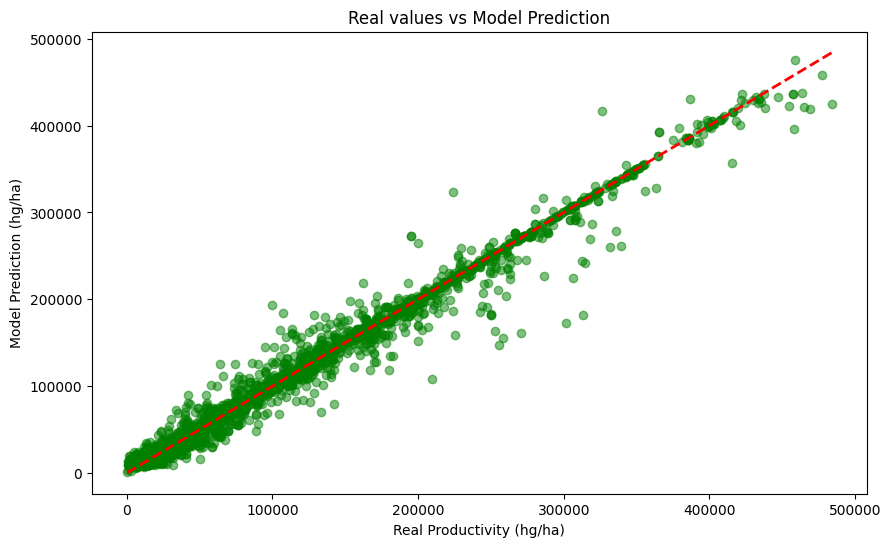

/tmp/ipykernel_2819/3819402732.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


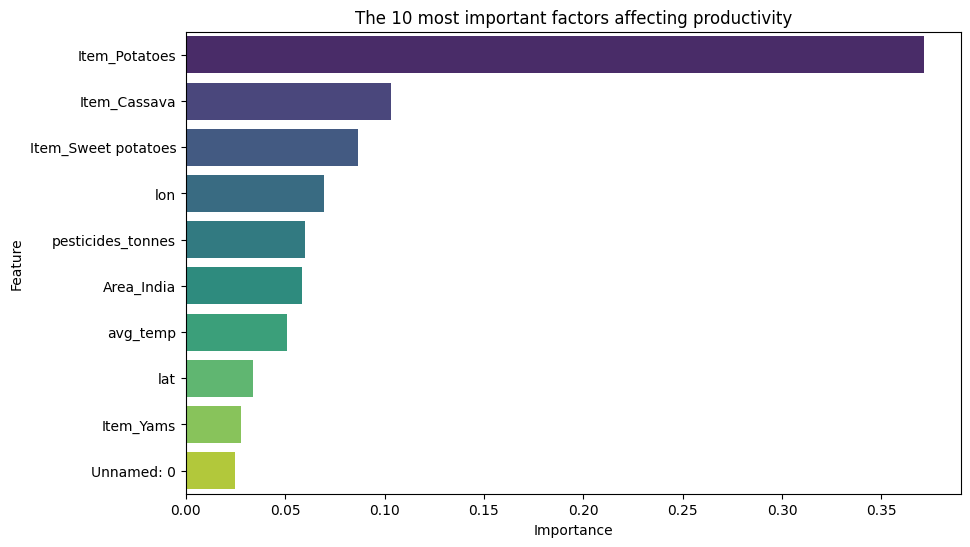

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Artıq sütunu silmək (lazım olarsa)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# 2. Real vs Təxmin qrafiki (Vizualizasiya)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Real Productivity (hg/ha)')
plt.ylabel('Model Prediction (hg/ha)')
plt.title('Real values vs Model Prediction')
plt.show()

# 3. Hansı amilin daha vacib olduğunu görmək (Feature Importance)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('The 10 most important factors affecting productivity')
plt.show()